In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from rdkit import Chem, Geometry
from rdkit.Chem import AllChem, Draw, PandasTools, rdFMCS, rdFingerprintGenerator, DataStructs, MACCSkeys
from rdkit.ML.Cluster import Butina
from copy import deepcopy
import mols2grid

In [3]:
data = pd.read_csv('data_clean.csv', index_col=0)

In [4]:
data.shape

(2943, 10)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2943 entries, 0 to 2942
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_chembl_id  2943 non-null   object 
 1   Ki                  2943 non-null   float64
 2   units               2943 non-null   object 
 3   pKi                 2943 non-null   float64
 4   smiles              2943 non-null   object 
 5   molecular_weight    2943 non-null   float64
 6   n_hba               2943 non-null   int64  
 7   n_hbd               2943 non-null   int64  
 8   logp                2943 non-null   float64
 9   passed              2943 non-null   bool   
dtypes: bool(1), float64(4), int64(2), object(3)
memory usage: 232.8+ KB


In [6]:
data.sort_values(by='pKi', ascending=True, inplace=True)

In [7]:
data.head(20)

,molecule_chembl_id,Ki,units,pKi,smiles,molecular_weight,n_hba,n_hbd,logp,passed
1037,CHEMBL520212,100000.0,nM,4.00,COc1cc(-c2nc3c([nH]2)c(=O)n(C)c(=O)n3C)ccc1OCC...,415.185569,10,1,0.34690,True
117,CHEMBL2112095,100000.0,nM,4.00,Nc1ncnc2c1ncn2[C@@]12C[C@H]1[C@H](CO)[C@@H](O)...,277.117489,8,5,-1.53240,True
919,CHEMBL458409,80600.0,nM,4.09,Cc1cc2c(c(C)c1O)c1ccncc1n2C,226.110613,3,1,3.04894,True
472,CHEMBL279898,81300.0,nM,4.09,CCCn1c(=O)[nH]c(=O)c2nc[nH]c21,194.080376,6,2,-0.17710,True
109,CHEMBL87496,72600.0,nM,4.14,CCOC(=O)c1sc(SCc2ccccc2)c2c1CCCC2=O,346.069736,3,0,4.73610,True
89,CHEMBL101525,58000.0,nM,4.24,Cn1c(=O)c2nn(C3CCCC3)nc2n(C)c1=O,249.122575,7,0,-0.05620,True
85,CHEMBL100810,52800.0,nM,4.28,Cn1nc2c(=O)n(C)c(=O)n(C)c2n1,195.075625,7,0,-1.63430,True
82,CHEMBL319534,49000.0,nM,4.31,Cn1c(=O)c2nn(C3CC4CCC3C4)nc2n(C)c1=O,275.138225,7,0,0.18980,True
79,CHEMBL113,48000.0,nM,4.32,Cn1c(=O)c2c(ncn2C)n(C)c1=O,194.080376,6,0,-1.02930,True
339,CHEMBL365026,46000.0,nM,4.34,c1ccc(Nc2nc3ncnc-3c(NC3CCCCCCC3)[nH]2)cc1,336.206245,6,3,4.57290,True


In [8]:
data.tail()

,molecule_chembl_id,Ki,units,pKi,smiles,molecular_weight,n_hba,n_hbd,logp,passed
2784,CHEMBL4778265,0.110,nM,9.96,Cc1cccnc1CNC(=O)c1c(N)nc(-c2ccco2)nc1OC[C@H](C)O,383.159354,9,4,1.71182,True
2938,CHEMBL5203105,0.081,nM,10.09,Cl.Cl.Nc1nc(C(=O)NCc2ccccn2)cn2c1nc1ccccc12,390.076264,7,3,2.63330,True
2786,CHEMBL4747929,0.078,nM,10.11,COc1nc(-c2ncco2)nc(N)c1C(=O)NCc1c(Cl)cccc1Cl,393.039545,8,3,2.95920,True
1995,CHEMBL3121726,0.072,nM,10.14,Cn1c(=O)c2[nH]c(-c3ccc(OC4CCCC4)cc3)nc2n(C)c1=O,340.153541,7,1,1.94870,True
274,CHEMBL136689,0.048,nM,10.32,COc1ccc(CCCn2ncc3c2nc(N)n2nc(-c4ccco4)nc32)cc1,389.160023,9,2,2.95760,True


In [9]:
bins = pd.cut(data['pKi'], bins=3).value_counts()
bins

pKi
(6.107, 8.213]    1701
(3.994, 6.107]     812
(8.213, 10.32]     430
Name: count, dtype: int64

Let's select ligands with highest activity according to pKi. Ki is equilibrium constant, so it means that higher Ki values and lower pKi value are better. Let's select ligands with pKi value lower than 7

In [11]:

presek = bins.index[2].left
presek

8.213

In [12]:
data = data[data['pKi'] >= presek]

We have selected 430 compounds according to this criterium

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 430 entries, 31 to 274
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_chembl_id  430 non-null    object 
 1   Ki                  430 non-null    float64
 2   units               430 non-null    object 
 3   pKi                 430 non-null    float64
 4   smiles              430 non-null    object 
 5   molecular_weight    430 non-null    float64
 6   n_hba               430 non-null    int64  
 7   n_hbd               430 non-null    int64  
 8   logp                430 non-null    float64
 9   passed              430 non-null    bool   
dtypes: bool(1), float64(4), int64(2), object(3)
memory usage: 34.0+ KB


In [14]:
data.reset_index(drop=True, inplace=True)

Let's cluster this molecules

We will use MACCS keys

In [15]:
PandasTools.AddMoleculeColumnToFrame(data, smilesCol='smiles', molCol='mols')

In [16]:
data['MACCS'] = data['mols'].apply(MACCSkeys.GenMACCSKeys)

In [17]:
def get_distances(fingerprints):
    distances = []
    for i in range(1, len(fingerprints)):
        similarity = DataStructs.BulkTanimotoSimilarity(fingerprints[i], fingerprints[:i])
        distances.extend([1 - sim for sim in similarity])
    return distances

In [18]:
def get_clusters(fingerprints, cut_off=0.2):
    distances = get_distances(fingerprints)
    clusters = Butina.ClusterData(distances, len(fingerprints), cut_off, isDistData=True)
    # clusters must be sorted descending according to its lenghts
    clusters = sorted(clusters, key=len, reverse=True)
    return clusters


In [19]:
def plot_clusters(fingerprints, name):
    br = 0
    fig, ax = plt.subplots(10, 1, figsize=(10, 20))
    for cut_off in np.arange(0.0, 1.0, 0.1):
        cls = get_clusters(fingerprints, cut_off=cut_off)
        ax[br].bar(x=np.arange(1, len(cls) + 1), height=[len(c) for c in cls])
        ax[br].set_xlabel('Clusters')
        ax[br].set_ylabel('Cluster sizes')
        ax[br].set_title(f'{name}: {len(cls)} clusters, cut_off = {cut_off:.2f}')
        ax[br].grid()
        br += 1
    plt.tight_layout()

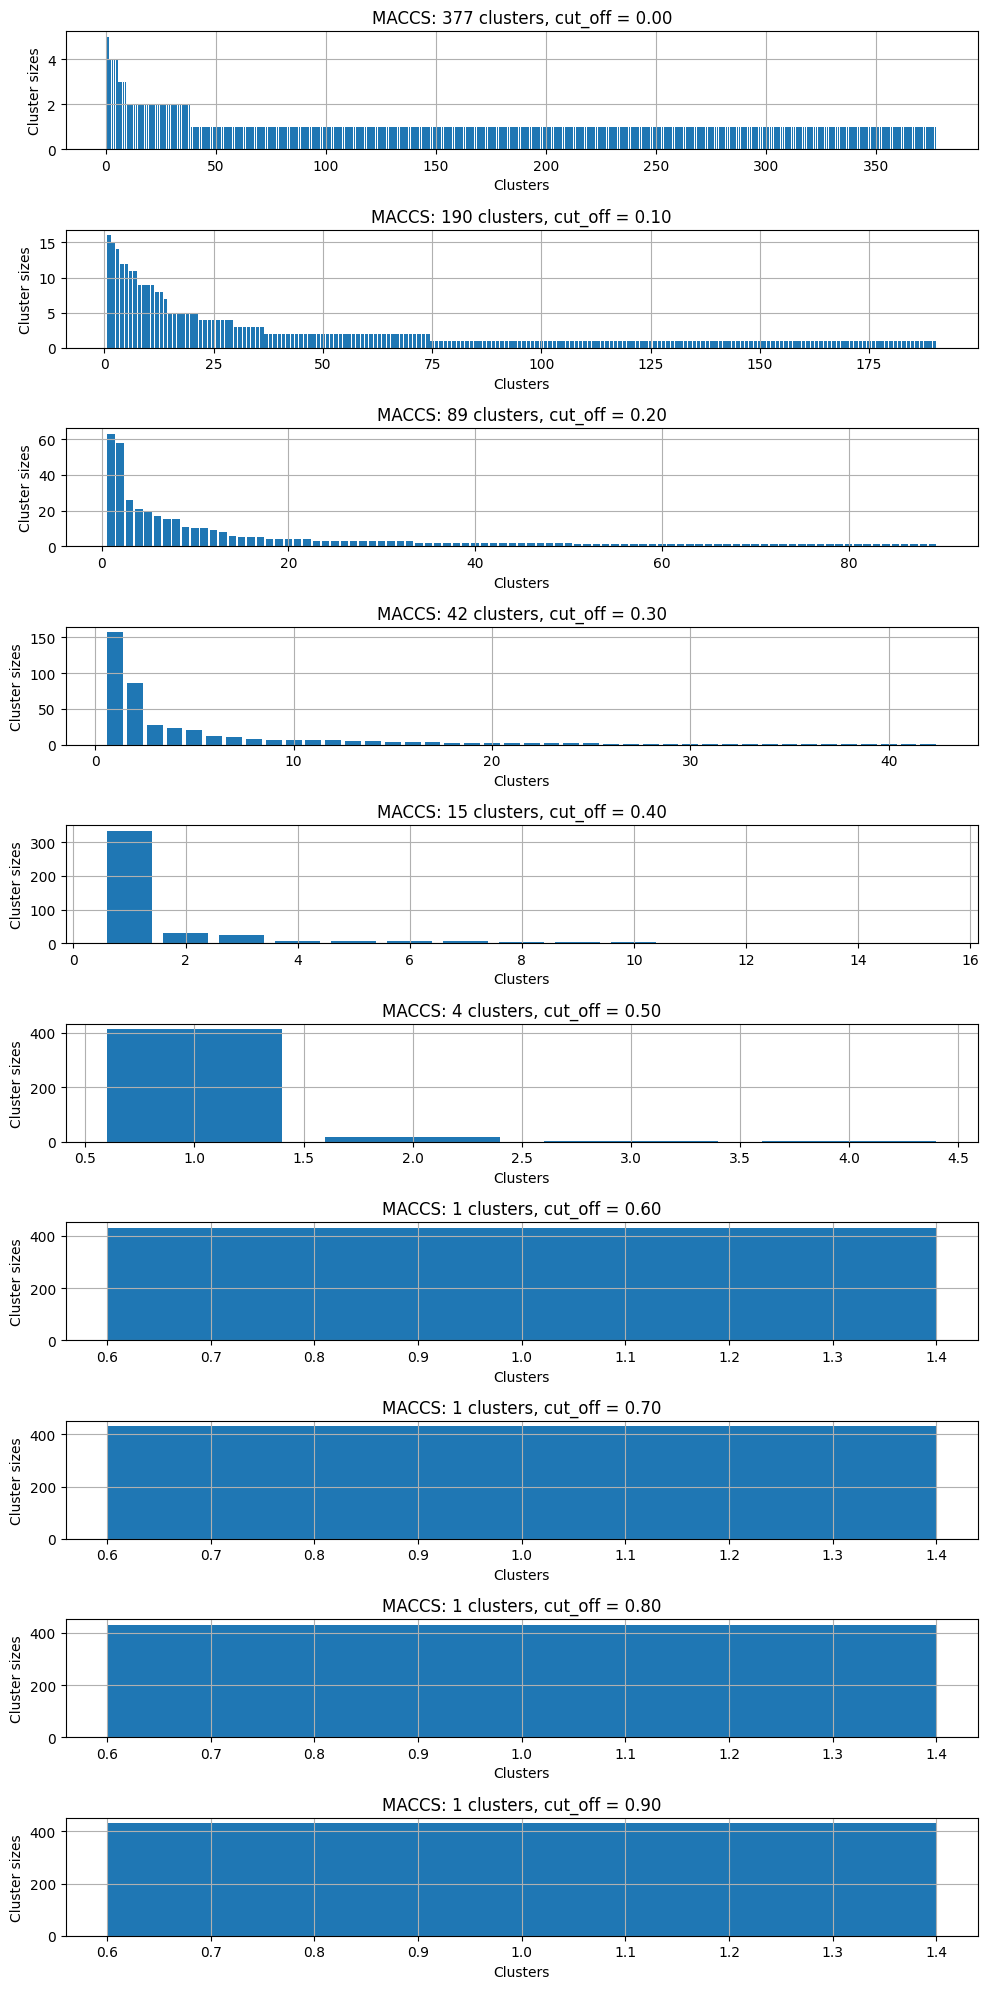

In [20]:
plot_clusters(data['MACCS'].to_list(), 'MACCS')

Let's see does Mogan gives better clusters

In [21]:
morgan_gen = rdFingerprintGenerator.GetMorganGenerator(radius=2)
data['morgan'] = data['mols'].apply(morgan_gen.GetFingerprint)

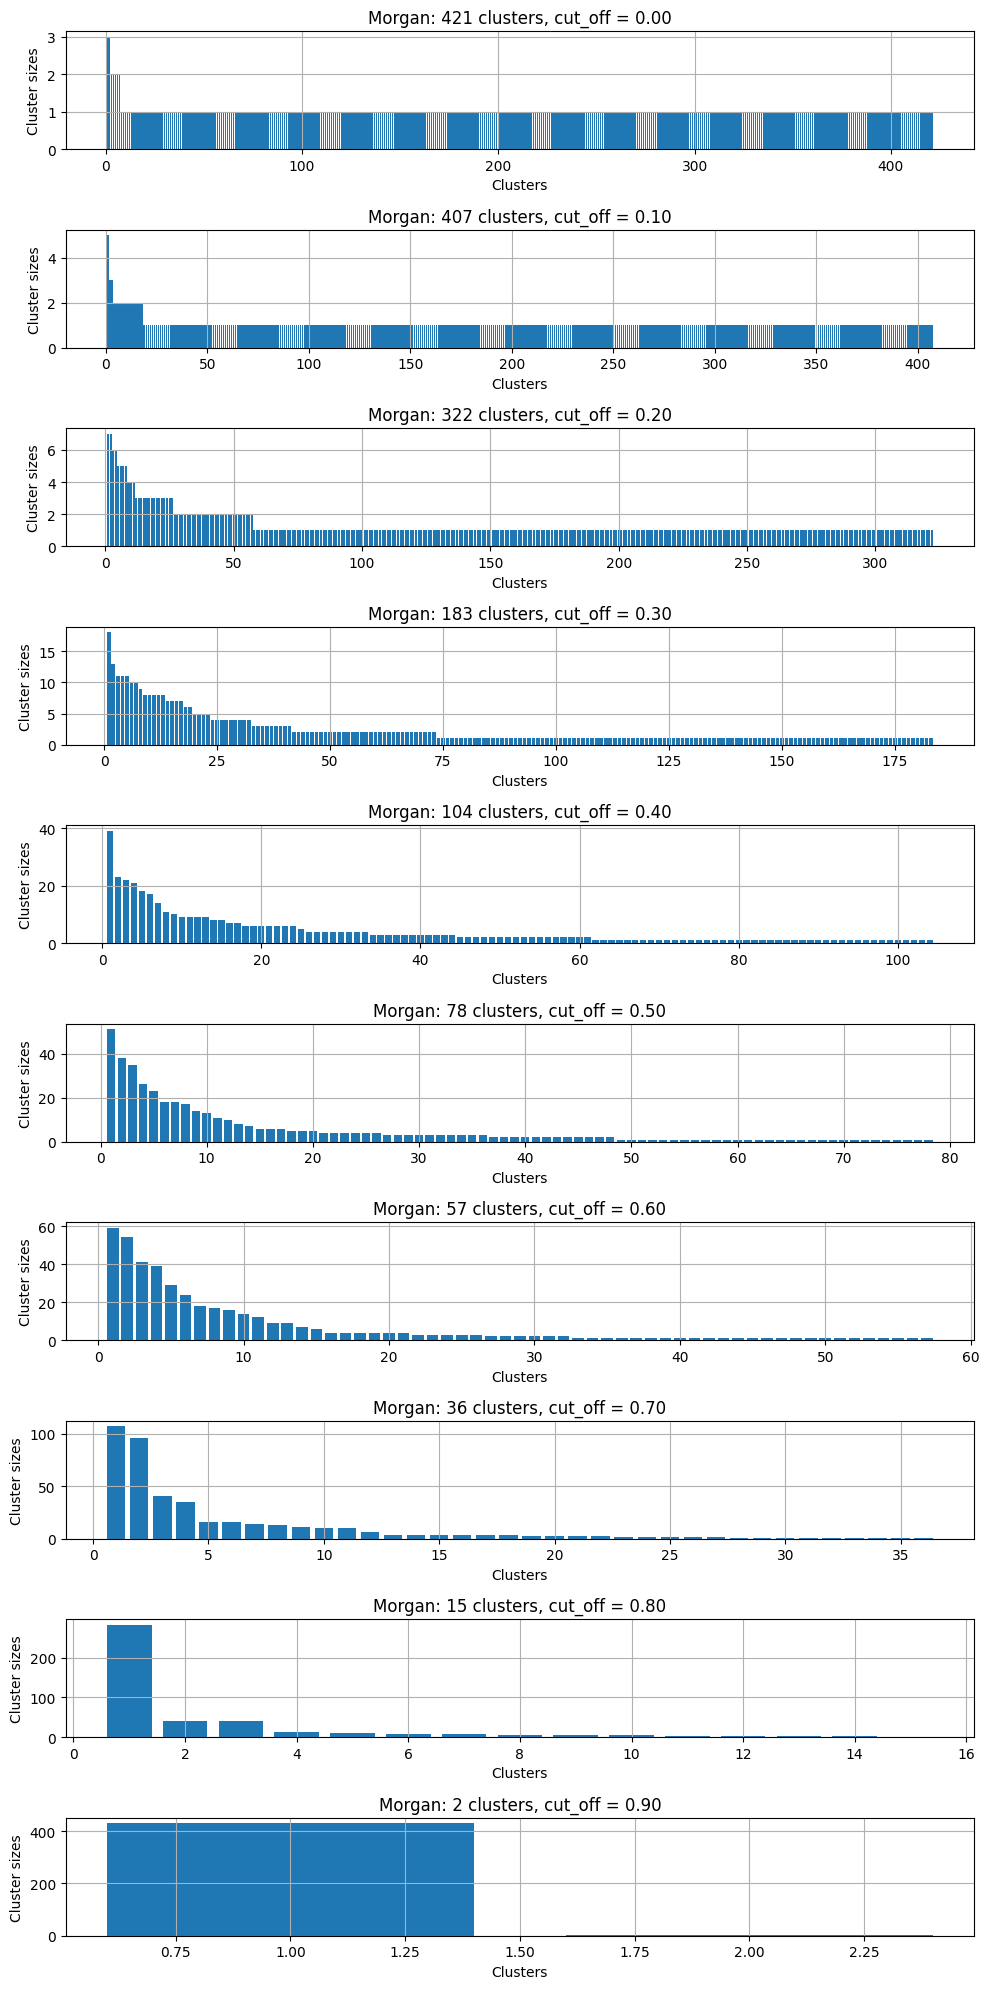

In [22]:
plot_clusters(data['morgan'].to_list(), 'Morgan')

I will use Morgan fingerprint with cut_off = 0.5 ans maccs fingerprints with cut_off = 0.3 as starting point

In [23]:
maccs_clusters = get_clusters(data['MACCS'].to_list(), cut_off=0.3)

In [24]:
morgan_clusters = get_clusters(data['morgan'].to_list(), cut_off=0.5)

Lets add columns with maccs and morgans cluster numbers

In [25]:
cluster_list = [-1] * len(data)
for i in range(len(morgan_clusters)):
    for cluster_number in morgan_clusters[i]:
        cluster_list[cluster_number] = i
data['morgan_clusters'] = cluster_list

In [26]:
cluster_list = [-1] * len(data)
for i in range(len(maccs_clusters)):
    for cluster_number in maccs_clusters[i]:
        cluster_list[cluster_number] = i
data['MACCS_clusters'] = cluster_list

In [27]:
data.head()

,molecule_chembl_id,Ki,units,pKi,smiles,molecular_weight,n_hba,n_hbd,logp,passed,mols,MACCS,morgan,morgan_clusters,MACCS_clusters
0,CHEMBL110698,6.0,nM,8.22,CCCN(C)C(=O)c1cc(N)n2nc(-c3ccc(Br)o3)nc2c1,377.048737,7,2,2.81600,True,<rdkit.Chem.rdchem.Mol object at 0x00000208CE1...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",11,4
1,CHEMBL480397,6.0,nM,8.22,Nc1nc(OCCN2CCN(c3ccc(F)cc3F)CC2)cc2nc(-c3ccco3...,441.172479,9,2,2.44570,True,<rdkit.Chem.rdchem.Mol object at 0x00000208CE1...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",7,0
2,CHEMBL511159,6.0,nM,8.22,CC(=O)Nc1cc(-c2cccc(OC3CCN(C)CC3)c2)nc(-n2nc(C...,420.227374,8,1,3.37754,True,<rdkit.Chem.rdchem.Mol object at 0x00000208CE1...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,0
3,CHEMBL256344,6.0,nM,8.22,Nc1nc(-c2ccco2)c2cnn(Cc3ccc(C(F)(F)F)cc3)c2n1,359.099395,6,2,3.73560,True,<rdkit.Chem.rdchem.Mol object at 0x00000208CE1...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3,1
4,CHEMBL324077,6.0,nM,8.22,Nc1cc(C(=O)N2CCCCC2)cc2nc(-c3ccc(Br)o3)nn12,389.048737,7,2,2.96010,True,<rdkit.Chem.rdchem.Mol object at 0x00000208CE1...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",11,0


In [28]:
len(data[data['morgan_clusters'] == 1]), len(data[data['morgan_clusters'] == 0])

(38, 51)

Let's see molecules from the first clusters

In [29]:
mols2grid.display(data[data['morgan_clusters'] == 0], mol_col='mols', subset=['img', 'molecule_chembl_id', 'morgan_clusters', 'pKi'])

MolGridWidget()

Let's try to find most common structure for first 3 morgan clusters

In [30]:
mcs_morg_0 = rdFMCS.FindMCS(data['mols'][data['morgan_clusters'] == 0.].to_list(), threshold=0.8, ringMatchesRingOnly=True)

In [31]:
print(f'MCS_morgan_0: atoms: {mcs_morg_0.numAtoms}, bonds: {mcs_morg_0.numBonds}')
print(f'MCS_morgan_0 smiles string: {mcs_morg_0.smartsString}')

MCS_morgan_0: atoms: 23, bonds: 25
MCS_morgan_0 smiles string: [#6&!R]-&!@[#6]1:&@[#6]:&@[#6](:&@[#7](:&@[#7]:&@1)-&!@[#6]1:&@[#6]:&@[#6](-&!@[#7&!R]-&!@[#6&!R](=&!@[#8&!R])-&!@[#6&!R]):&@[#7]:&@[#6](:&@[#7]:&@1)-&!@[#6]1:&@[#6]:&@[#6]:&@[#6](:&@[#8]:&@1)-&!@[#6&!R])-&!@[#6&!R]


In [32]:
mols2grid.display(data[data['morgan_clusters'] == 1], mol_col='mols', subset=['img', 'molecule_chembl_id', 'morgan_clusters', 'pKi'])

MolGridWidget()

In [33]:
mcs_morg_1 = rdFMCS.FindMCS(data['mols'][data['morgan_clusters'] == 1].to_list(), threshold=0.8, ringMatchesRingOnly=True)
print(f'MCS_morgan_1: atoms: {mcs_morg_1.numAtoms}, bonds: {mcs_morg_1.numBonds}')
print(f'mcs_morg_1 smarts string: {mcs_morg_1.smartsString}')

MCS_morgan_1: atoms: 22, bonds: 23
mcs_morg_1 smarts string: [#6&!R]-&!@[#6&!R](=&!@[#8&!R])-&!@[#7&!R]-&!@[#6]1:&@[#6]:&@[#6](-&!@[#6&R]:&@[#6&R]:&@[#6&R]:&@[#6&R]:&@[#6&R]):&@[#7]:&@[#6](:&@[#7]:&@1)-&!@[#7]1:&@[#7]:&@[#6](:&@[#6]:&@[#6]:&@1-&!@[#6&!R])-&!@[#6&!R]


In [34]:
mols2grid.display(data[data['morgan_clusters'] == 2], mol_col='mols', subset=['img', 'molecule_chembl_id', 'morgan_clusters', 'pKi'])

MolGridWidget()

In [35]:
mcs_morg_2 = rdFMCS.FindMCS(data['mols'][data['morgan_clusters'] == 2].to_list(), threshold=0.8, ringMatchesRingOnly=True)
print(f'MCS_morgan_2: atoms: {mcs_morg_2.numAtoms}, bonds: {mcs_morg_2.numBonds}')
print(f'MCS_morgan_2 smarts string: {mcs_morg_2.smartsString}')

MCS_morgan_2: atoms: 20, bonds: 22
MCS_morgan_2 smarts string: [#6&!R]-&!@[#6&!R]-&!@[#7]1:&@[#6]:&@[#6](:&@[#6]:&@[#7]:&@1):&@[#6]1:&@[#7]:&@[#6](:&@[#7]:&@[#7]:&@1:&@[#6&R](:&@[#7&R])-&!@[#7&!R])-&!@[#6]1:&@[#6]:&@[#6]:&@[#6]:&@[#8]:&@1


In [36]:
def highlight_matches(df, mcs, number=10, same_orientation=True, **kwargs):
    molecules = df['mols'].to_list()
    names = df['molecule_chembl_id'].to_list()[:number]
    pattern = Chem.MolFromSmarts(mcs.smartsString)
    matches = [mol.GetSubstructMatch(pattern) for mol in molecules[:number]]

    if same_orientation:
        mol, match = molecules[0], matches[0]
        AllChem.Compute2DCoords(mol)
        coords = [mol.GetConformer().GetAtomPosition(x) for x in match]
        coords2D = [Geometry.Point2D(pt.x, pt.y) for pt in coords]
        for mol, match in zip(molecules[1:number], matches[1:number]):
            if not match:
                continue
            coord_dict = {match[i]: coord for i, coord in enumerate(coords2D)}
            AllChem.Compute2DCoords(mol, coordMap=coord_dict)

    return Draw.MolsToGridImage(
        molecules[:number],
        legends=names,
        highlightAtomLists=matches,
        molsPerRow=5,
        **kwargs
    )

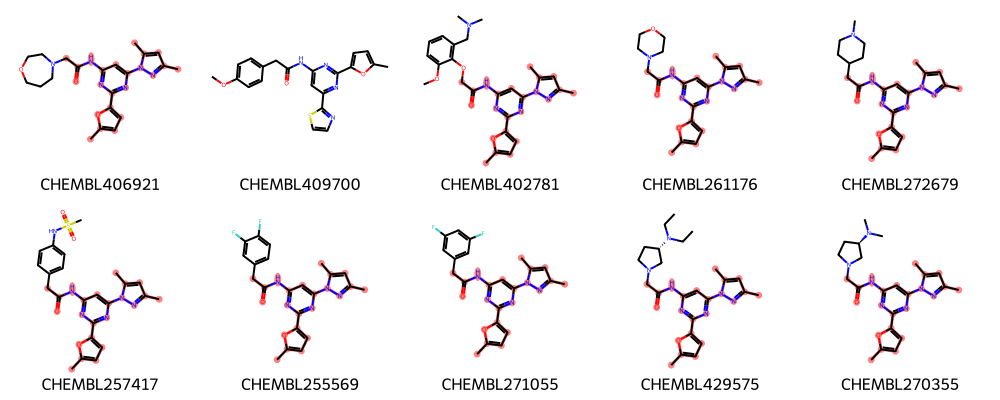

In [37]:
highlight_matches(data[['mols', 'molecule_chembl_id']][data['morgan_clusters'] == 0], mcs_morg_0)

highlighting structures for second morgan cluster

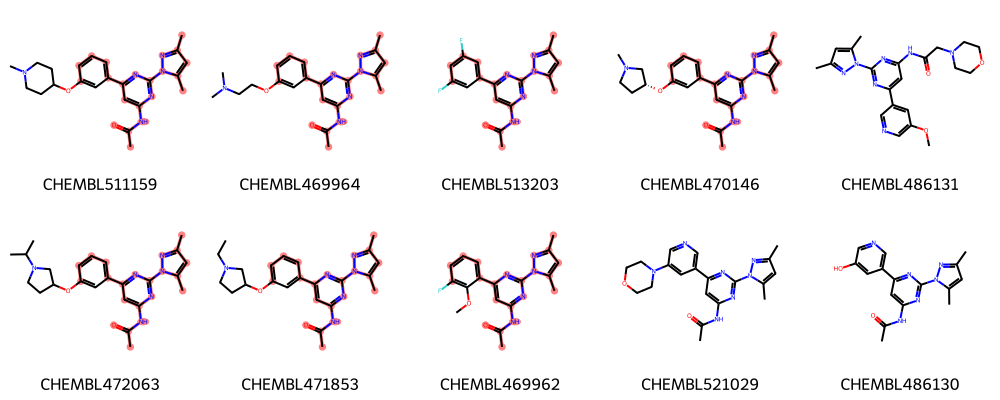

In [38]:
highlight_matches(data[['mols', 'molecule_chembl_id']][data['morgan_clusters'] == 1], mcs_morg_1)

highlight molecules from third morgan cluster

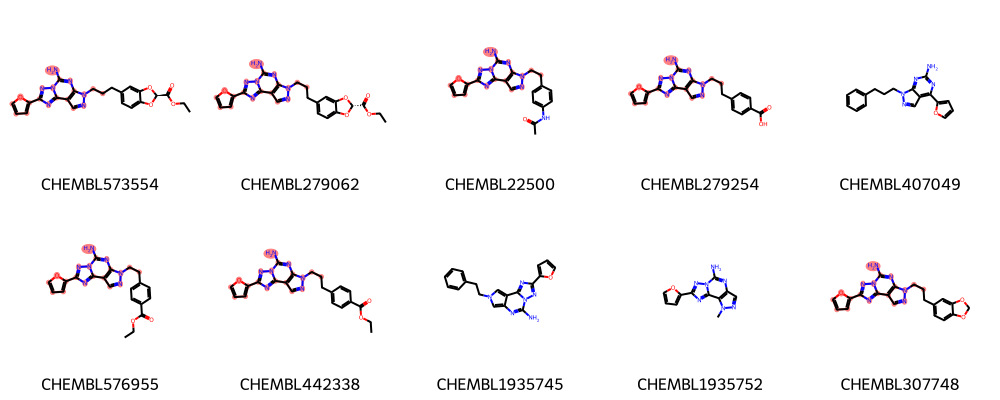

In [39]:
highlight_matches(data[['mols', 'molecule_chembl_id']][data['morgan_clusters'] == 2], mcs_morg_2)

Lets try to sistematize pKi values with clusters

In [40]:
min_pKi = []
max_pKi = []
cluster_len = []
cluster_no = []

for i in range(len(morgan_clusters)):
    min_pKi.append(data['pKi'][data['morgan_clusters'] == i].min())
    max_pKi.append(data['pKi'][data['morgan_clusters'] == i].max())
    cluster_no.append(i)
    cluster_len.append(len(data[data['morgan_clusters'] == i]))
    

morgan_df = pd.DataFrame(
    {
        'cluster_no': cluster_no,
        'cluster_length': cluster_len,
        'pKi_min': min_pKi,
        'pKi_max': max_pKi
    }
)

In [41]:
morgan_df[morgan_df['cluster_length'] > 5]

,cluster_no,cluster_length,pKi_min,pKi_max
0,0,51,8.22,9.70
1,1,38,8.22,9.70
2,2,35,8.26,10.32
3,3,26,8.22,9.00
4,4,23,8.30,9.70
5,5,18,8.26,10.09
6,6,18,8.22,8.77
7,7,17,8.22,9.52
8,8,14,8.24,9.62
9,9,13,8.24,9.77


Let's do it with maccs clusters

In [42]:
mols2grid.display(data[data['MACCS_clusters'] == 0], mol_col='mols', subset=['img', 'molecule_chembl_id', 'MACCS_clusters', 'pKi'])


MolGridWidget()

In [43]:
mcs_maccs_0 = rdFMCS.FindMCS(data['mols'][data['MACCS_clusters'] == 0].to_list(), ringMatchesRingOnly=True)
print(f'MCS_maccs_0: atoms: {mcs_maccs_0.numAtoms}, bonds: {mcs_maccs_0.numBonds}')
print(f'MCS_maccs_0 smarts string: {mcs_maccs_0.smartsString}')

MCS_maccs_0: atoms: 4, bonds: 3
MCS_maccs_0 smarts string: [#7&R](:,-;@[#6&R]:,-;@[#6&R]):,-;@[#6&R]


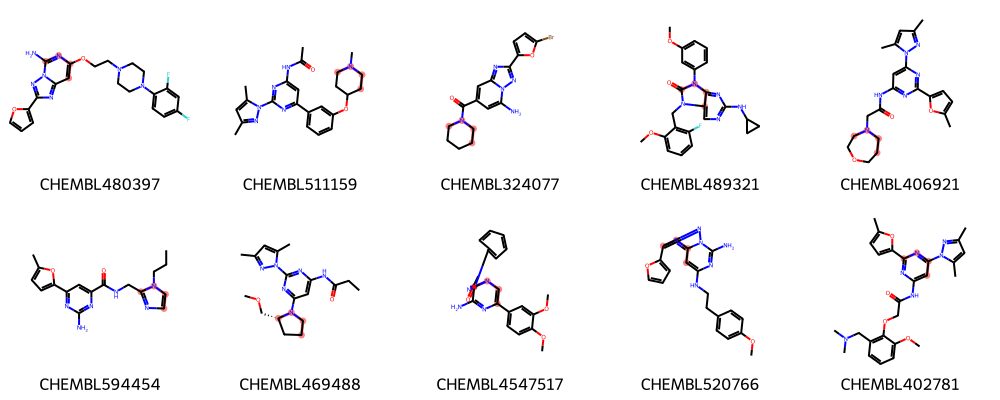

In [44]:
highlight_matches(data[['mols', 'molecule_chembl_id']][data['MACCS_clusters'] == 0], mcs_maccs_0)